### Context:

- LoanTap is an online platform committed to delivering customized loan products to millennials. 
- They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.


- The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

- LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:


- Personal Loan
- EMI Free Loan
- Personal Overdraft
- Advance Salary Loan


- This case study will focus on the underwriting process behind Personal Loan only


## Problem Statement:

- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?



## Data dictionary:

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual



        Concept Used:

        Exploratory Data Analysis
        Feature Engineering
        Logistic Regression
        Precision Vs Recall Tradeoff




    Simple Feature Engineering steps:
    E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

    1. Pub_rec
    2. Mort_acc
    3. Pub_rec_bankruptcies

- Missing values and Outlier Treatment
- Scaling - Using MinMaxScaler or StandardScaler
- Used Logistic Regression Model from Sklearn/Statsmodel library and explain the results

#####  Results Evaluation:

- Classification Report
- ROC AUC curve
- Precision recall curve

####  Tradeoff Questions:

- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone






In [676]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [677]:
df = pd.read_csv("logistic_regression.txt")

In [678]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [679]:
df.shape

(396030, 27)

- #### 396030 data points , 26 features , 1 label.

## Missing Values Check: 

In [680]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]


,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692


In [681]:
(df.isna().sum() / df.shape[0] ) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

### Descriptive Statistics : 

In [682]:
df.describe().round(1)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,395754.0,396030.0,358235.0,395495.0
mean,14113.9,13.6,431.8,74203.2,17.4,11.3,0.2,15844.5,53.8,25.4,1.8,0.1
std,8357.4,4.5,250.7,61637.6,18.0,5.1,0.5,20591.8,24.5,11.9,2.1,0.4
min,500.0,5.3,16.1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
25%,8000.0,10.5,250.3,45000.0,11.3,8.0,0.0,6025.0,35.8,17.0,0.0,0.0
50%,12000.0,13.3,375.4,64000.0,16.9,10.0,0.0,11181.0,54.8,24.0,1.0,0.0
75%,20000.0,16.5,567.3,90000.0,23.0,14.0,0.0,19620.0,72.9,32.0,3.0,0.0
max,40000.0,31.0,1533.8,8706582.0,9999.0,90.0,86.0,1743266.0,892.3,151.0,34.0,8.0


- #### Loan Amount, Installments, Annual Income , revol_bal : all these columns have large differnece in mean and median . That means outliers are present in the data. 

In [683]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [685]:
columns_type = df.dtypes

In [686]:
columns_type[columns_type=="object"]

term                   object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
title                  object
earliest_cr_line       object
initial_list_status    object
application_type       object
address                object
dtype: object

In [687]:
df.describe(include="object")

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [688]:
len(columns_type[columns_type=="object"])

15

In [689]:
26-15 


11

- #### 15 Non-numerical (categorical/date time) features present in the dataset. 

In [690]:
df["loan_status"].value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

- #### As we can see, there is an imbalance in the data. 
- 80% belongs to the class 0 : which is loan fully paid. 
- 20% belongs to the class 1 : which were charged off. 

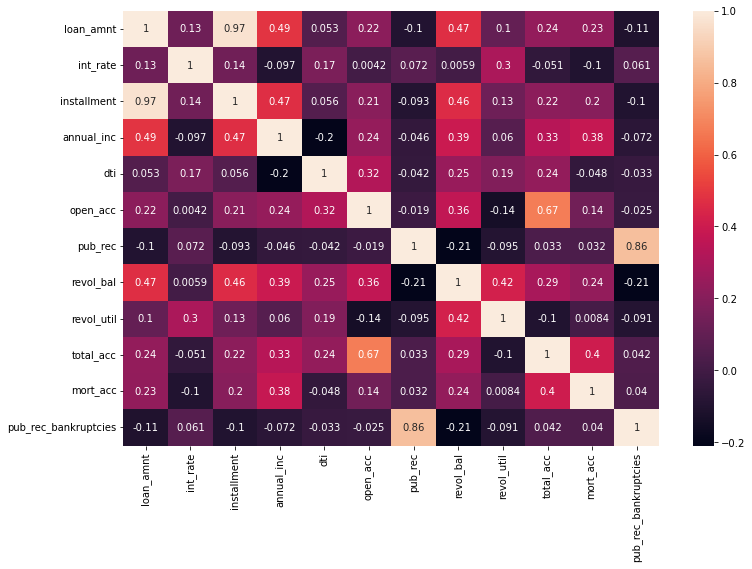

In [691]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

- installment: momthly payment owed by the borrower
- loan_amt : listed amount of the loan applied for by the borrower.

- #### we can notice that installment and loan-amount have very strong correlation .  

In [692]:
df.drop(["installment"], axis = 1 , inplace = True)

## loan_amnt :

- #### The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [693]:
df.groupby(by = "loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

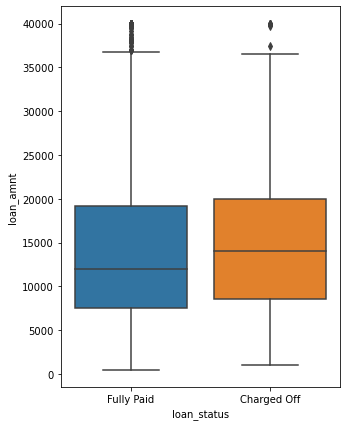

In [694]:
plt.figure(figsize=(5,7))
sns.boxplot(y=df["loan_amnt"],
            x=df["loan_status"])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

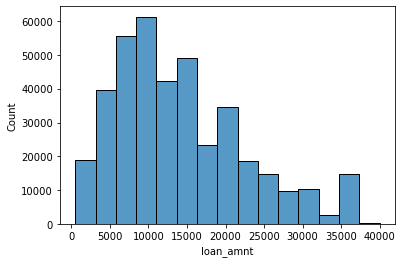

In [695]:
sns.histplot(df["loan_amnt"],bins = 15)

- ####  for loan status Charged_off, the mean and median of loan_amount is higher than fully paid.
- #### also the distribution of loan_amnt is right skewed, which says it has outlier presence. 


In [696]:
df[df["loan_status"] == "Fully Paid"]["loan_amnt"].median(),df[df["loan_status"] == "Fully Paid"]["loan_amnt"].mean()

(12000.0, 13866.878771316478)

In [697]:
df[df["loan_status"] == "Charged Off"]["loan_amnt"].median(),df[df["loan_status"] == "Charged Off"]["loan_amnt"].mean()

(14000.0, 15126.300966873945)

##  term :

- #### The number of payments on the loan. Values are in months and can be either 36 or 60.


In [698]:
df["term"].value_counts(dropna=False)

 36 months    302005
 60 months     94025
Name: term, dtype: int64

####  P[loan_statis | term]

In [699]:
pd.crosstab(index=df["term"],
            columns=df["loan_status"], normalize="index" , margins  = True
           ) * 100

loan_status,Charged Off,Fully Paid
term,,
36 months,15.774573,84.225427
60 months,31.941505,68.058495
All,19.612908,80.387092


<AxesSubplot:xlabel='term'>

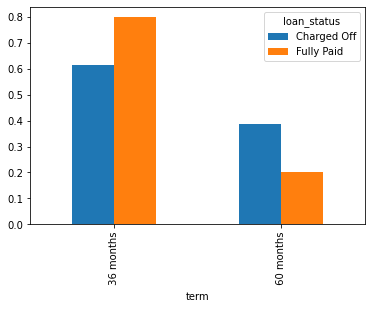

In [700]:
pd.crosstab(index=df["term"],
            columns =df["loan_status"], normalize="columns"
           ).plot(kind = "bar")

In [701]:
# as we can observe 
# the conditional probability 
# of loan fully paid given that its 36 month term is higher then charged off.  

# loan fully paid probability when 60 month term is lower than charged off. 

In [702]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df['term'].map(term_values)


##  int_rate :

- #### Interest Rate on the loan


In [703]:
df.groupby(by = "loan_status")["int_rate"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


<AxesSubplot:xlabel='int_rate', ylabel='Count'>

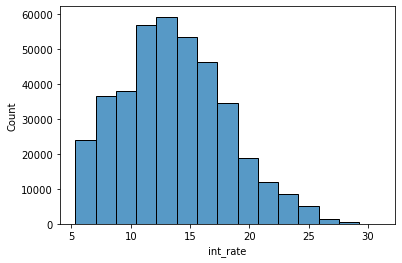

In [704]:
sns.histplot(df["int_rate"],bins = 15)

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

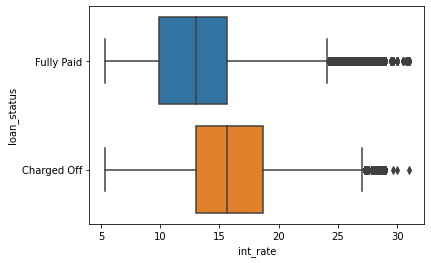

In [705]:
sns.boxplot(x=df["int_rate"],
            y=df["loan_status"])

In [706]:
df[df["loan_status"] == "Charged Off"]["int_rate"].median(),df[df["loan_status"] == "Charged Off"]["int_rate"].mean()


(15.61, 15.882587256832393)

In [707]:
df[df["loan_status"] == "Fully Paid"]["int_rate"].median(),df[df["loan_status"] == "Fully Paid"]["int_rate"].mean()

(12.99, 13.092105403703817)

In [708]:
# for charge_off Loan Status ,
# interest_rate median and mean is higher than fully paid.


- ####  for loan status Charged_off, the mean and median of interest_rate is higher than fully paid.
- #### also the distribution of interest_rate is right skewed, which says it has outlier presence. 


##  grade :

- #### LoanTap assigned loan grade

- #### Loan grades are set based on both the borrower's credit profile and the nature of the contract.


<AxesSubplot:>

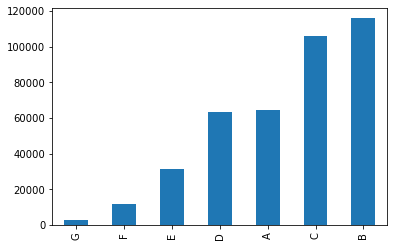

In [709]:
df["grade"].value_counts().sort_values().plot(kind = "bar")

In [710]:
df["grade"].value_counts(dropna=False)

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [711]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "index", margins = True)

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611
All,0.196129,0.803871


<AxesSubplot:xlabel='grade'>

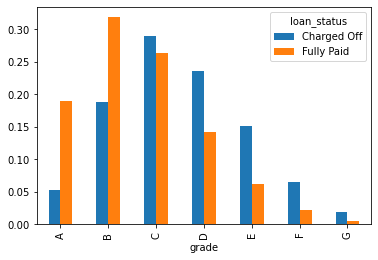

In [712]:
pd.crosstab(index = df["grade"],
            columns= df["loan_status"],normalize= "columns").plot(kind  = "bar")

In [713]:
#  probability of loan_status as fully_paid decreases with grade is E,F,G

In [714]:
## we can conclude the relationship exists 
## between loan_status and LoanTap assigned loan grade.



## sub_grade : 

- #### LoanTap assigned loan subgrade


In [715]:
# pd.crosstab(index = df["sub_grade"],
#             columns= df["loan_status"],normalize= "index", margins = True)*100

<AxesSubplot:xlabel='sub_grade'>

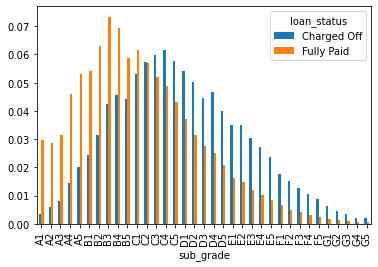

In [716]:
pd.crosstab(index = df["sub_grade"],
            columns= df["loan_status"],normalize= "columns", ).plot(kind = "bar")

In [717]:
# Similar pattern is observed for sub_grade as grade . 

#  later target encoding 

##   emp_title :

- #### The job title supplied by the Borrower when applying for the loan.*


In [718]:
df["emp_title"].value_counts(dropna=False).sort_values(ascending=False).head(15)

NaN                 22927
Teacher              4389
Manager              4250
Registered Nurse     1856
RN                   1846
Supervisor           1830
Sales                1638
Project Manager      1505
Owner                1410
Driver               1339
Office Manager       1218
manager              1145
Director             1089
General Manager      1074
Engineer              995
Name: emp_title, dtype: int64

In [719]:
df["emp_title"].nunique()

173105

In [720]:
# missing values need to be treated with model based imputation .


# total unique job_titles are 173,105. 
# target encoding while creating model. 

##  emp_length :

- #### Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


In [721]:
df["emp_length"].value_counts(dropna=False)

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
NaN           18301
9 years       15314
Name: emp_length, dtype: int64

In [722]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,19.913453,80.086547
10+ years,18.418610,81.581390
2 years,19.326206,80.673794
3 years,19.523133,80.476867
4 years,19.238477,80.761523
5 years,19.218721,80.781279
6 years,18.919438,81.080562
7 years,19.477400,80.522600
8 years,19.976002,80.023998


<AxesSubplot:xlabel='emp_length'>

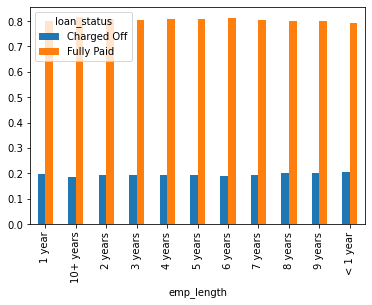

In [723]:
pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [724]:
# visually there doent seems to be much correlation between employement length 
# and loan_status.


In [725]:
stats.chi2_contingency(pd.crosstab(index = df["emp_length"],
            columns= df["loan_status"]))

<IPython.core.display.Javascript object>

(122.11317384460878,
 1.88404995201913e-21,
 10,
 array([[  4976.95191526,  20905.04808474],
        [ 24236.9212716 , 101804.0787284 ],
        [  6889.31521011,  28937.68478989],
        [  6088.98780607,  25576.01219393],
        [  4605.82459912,  19346.17540088],
        [  5094.82810428,  21400.17189572],
        [  4007.59813252,  16833.40186748],
        [  4003.36766571,  16815.63233429],
        [  3685.89036055,  15482.10963945],
        [  2944.78949194,  12369.21050806],
        [  6100.52544284,  25624.47455716]]))

##  home_ownership : 

- #### The home ownership status provided by the borrower during registration or obtained from the credit report.


In [726]:
df["home_ownership"].value_counts(dropna=False)

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [727]:
df["home_ownership"] = df["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})

In [728]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,16.956057,83.043943
OTHER,15.753425,84.246575
OWN,20.680337,79.319663
RENT,22.662244,77.337756
All,19.612908,80.387092


<AxesSubplot:xlabel='home_ownership'>

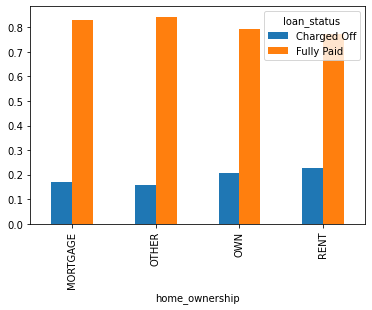

In [729]:
pd.crosstab(index = df["home_ownership"],
            columns= df["loan_status"],normalize= "index").plot(kind= "bar")

In [730]:
# visually there doent seems to be much correlation between home_ownership 
# and loan_status.
# later target encoding or label encoding .


## annual_inc :

- #### The self-reported annual income provided by the borrower during registration.


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

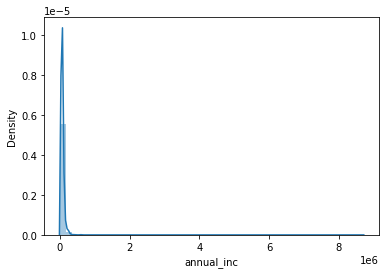

In [731]:
sns.distplot(df["annual_inc"])

In [732]:
df["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

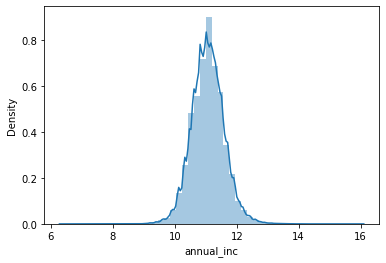

In [733]:
sns.distplot(np.log(df[df["annual_inc"]>0]["annual_inc"]))

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

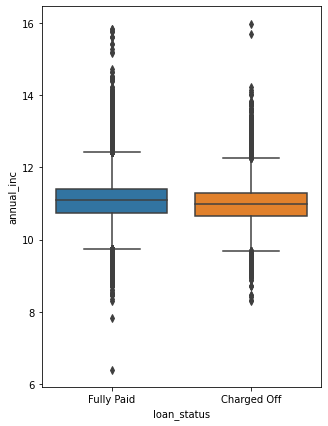

In [734]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["annual_inc"]>0]["annual_inc"]),
            x=df["loan_status"])

In [735]:
##from above boxplot, there seems to be no difference between annual income,
# for loan status categories 


##  verification_status : 

- #### Indicates if income was verified by LoanTap, not verified, or if the income source was verified


In [736]:
df["verification_status"].value_counts(dropna=False)

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [737]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index", margins = True)*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.635999,85.364001
Source Verified,21.474293,78.525707
Verified,22.321102,77.678898
All,19.612908,80.387092


<AxesSubplot:xlabel='verification_status'>

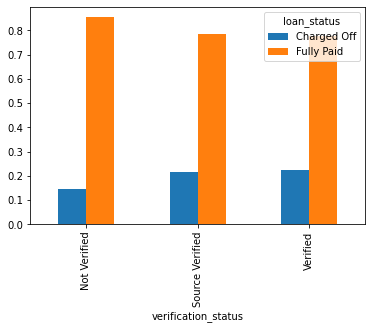

In [738]:
pd.crosstab(index = df["verification_status"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")

In [739]:


# later  label encoding  
# .
# Verified           1
# Source Verified    2
# Not Verified       0


## purpose :
- #### A category provided by the borrower for the loan request.


In [740]:
df["purpose"].nunique()

14

### 13. 

###  loan_status : Current status of the loan - Target Variable


<AxesSubplot:>

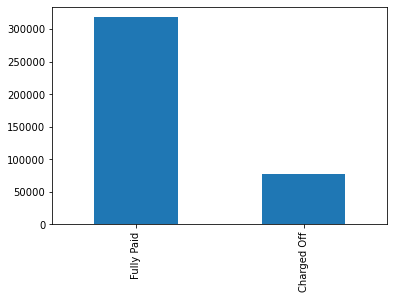

In [741]:
df["loan_status"].value_counts(dropna=False).plot(kind = "bar")


In [742]:
df["loan_status"].value_counts(dropna=False, normalize=True)  * 100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [743]:
# Imbalanced data. 

# 80% loans are fully paid.
# 20% loans are charged_off 

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64


<AxesSubplot:xlabel='purpose'>

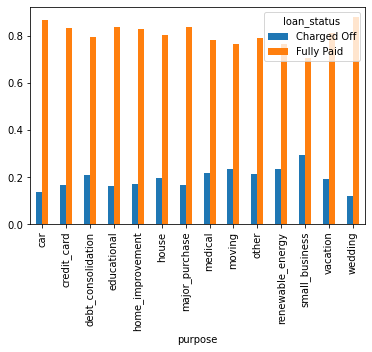

In [744]:
print(df["purpose"].value_counts(dropna=False))
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index", margins = True)*100
pd.crosstab(index = df["purpose"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


<AxesSubplot:>

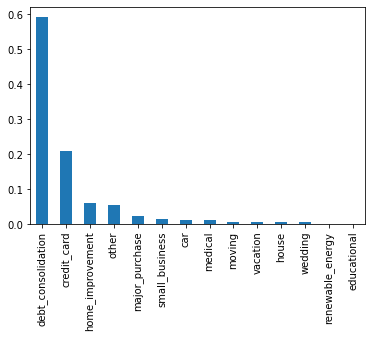

In [745]:
(df["purpose"].value_counts(dropna=False,normalize=True)).plot(kind = "bar")


    ## most of the loans are taken for 
        debit_card,
        dept_consolidation , 
        home_improvement and others category. 
    ## number of loan applications and amount per purpose category are highest in  above category.

 

##  title :

- #### The loan title provided by the borrower




In [746]:
df["title"].nunique()

48817

In [747]:
df["title"]

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [748]:
# title and purpose are in a way same features. 
# later needs to drop this feature. 


##  dti :
- #### A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.


    dti = monthly total dept payment / monthly income excluding mortgages

In [749]:
df["dti"].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

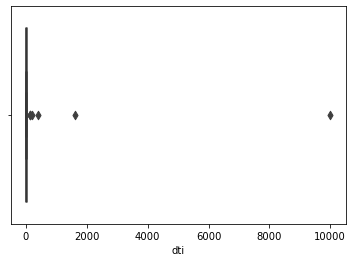

In [750]:
sns.boxenplot((df["dti"]))

In [751]:
# looks like there are lots of outliers in dti column .

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

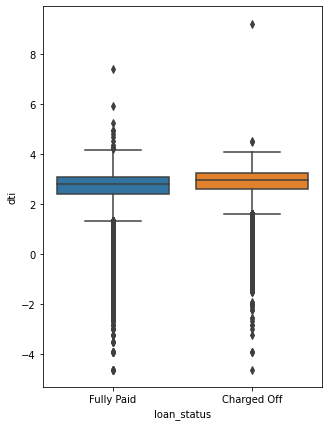

In [752]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(df[df["dti"]>0]["dti"]),
            x=df["loan_status"])

     issue_d :
    The month which the loan was funded¶

### issue_d :
- #### The month which the loan was funded


In [753]:
# df["issue_d"].value_counts(dropna=False)

# later use in feature engineering ! 

## earliest_cr_line :
- #### The month the borrower's earliest reported credit line was opened


In [754]:
df["Loan_Tenure"] = ((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))

In [755]:
# pd.to_datetime(df["earliest_cr_line"])

In [756]:
# The month which the loan was funded

In [757]:
# pd.to_datetime(df["issue_d"])

<AxesSubplot:ylabel='Count'>

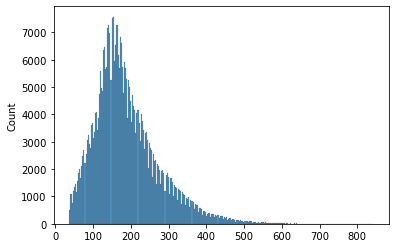

In [758]:
 sns.histplot(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M')))


<AxesSubplot:xlabel='loan_status'>

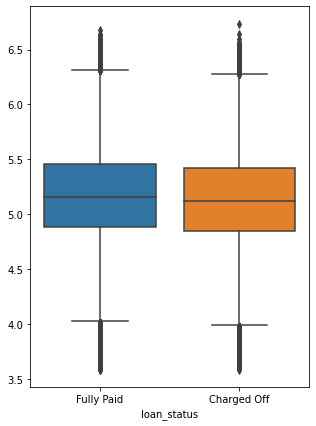

In [759]:
plt.figure(figsize=(5,7))
sns.boxplot(y=np.log(((pd.to_datetime(df["issue_d"]) -pd.to_datetime(df["earliest_cr_line"]))/np.timedelta64(1, 'M'))),
            x=df["loan_status"])

## open_acc : 

- #### The number of open credit lines in the borrower's credit file.


In [760]:
df.groupby("loan_status")["open_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,11.602513,5.288507,0.0,8.0,11.0,14.0,76.0
Fully Paid,318357.0,11.240067,5.097647,0.0,8.0,10.0,14.0,90.0


In [761]:
df["open_acc"].nunique()

61

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

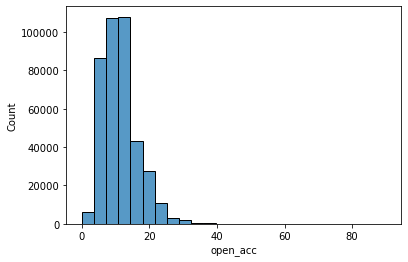

In [762]:
sns.histplot(df["open_acc"],bins = 25)


<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

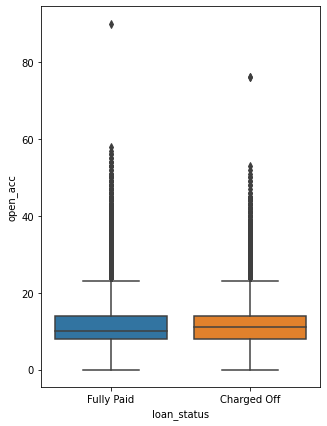

In [763]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["open_acc"],
            x=df["loan_status"])

## pub_rec : 

- #### Number of derogatory public records



- “Derogatory” is seen as negative to lenders, and can include late payments, collection accounts, bankruptcy, charge-offs and other negative marks on your credit report. This can impact your ability to qualify for new credit.

In [764]:
df.groupby("loan_status")["pub_rec"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,0.199606,0.648283,0.0,0.0,0.0,0.0,86.0
Fully Paid,318357.0,0.172966,0.497637,0.0,0.0,0.0,0.0,24.0


<AxesSubplot:xlabel='loan_status', ylabel='pub_rec'>

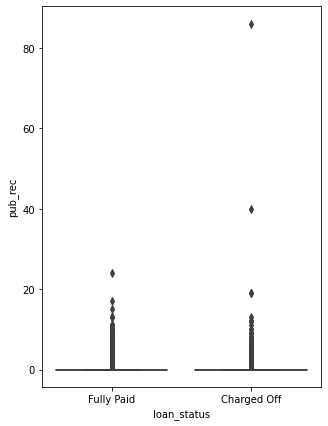

In [765]:
plt.figure(figsize=(5,7))
sns.boxplot(y= df["pub_rec"],
            x=df["loan_status"])

## revol_bal : 

- #### Total credit revolving balance


With revolving credit, a consumer has a line of credit he can keep using and repaying over and over. The balance that carries over from one month to the next is the revolving balance on that loan.




In [766]:
df.groupby("loan_status")["revol_bal"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15390.454701,18203.387930,0.0,6150.0,11277.0,19485.0,1030826.0
Fully Paid,318357.0,15955.327918,21132.193457,0.0,5992.0,11158.0,19657.0,1743266.0


<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

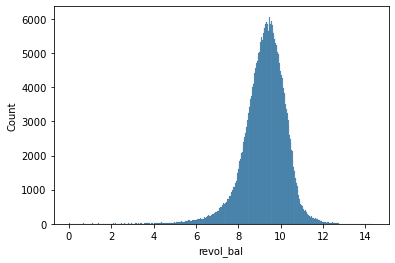

In [767]:
sns.histplot(np.log(df["revol_bal"]))


<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

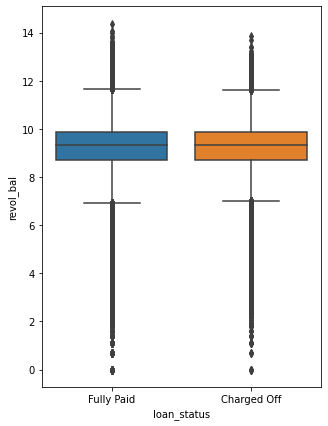

In [768]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_bal"]),
            x=df["loan_status"])

##  revol_util :
- #### Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Your credit utilization rate, sometimes called your credit utilization ratio, is the amount of revolving credit you're currently using divided by the total amount of revolving credit you have available. In other words, it's how much you currently owe divided by your credit limit. It is generally expressed as a percent.

In [769]:
df.groupby("loan_status")["revol_util"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77610.0,57.869824,23.492176,0.0,41.2,59.3,76.2,148.0
Fully Paid,318144.0,52.796918,24.578304,0.0,34.6,53.7,72.0,892.3


<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

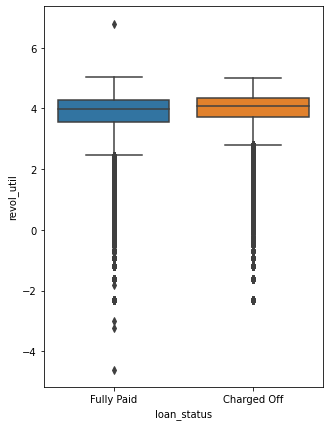

In [770]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["revol_util"]),
            x=df["loan_status"])

##  total_acc : 

- #### The total number of credit lines currently in the borrower's credit file


In [771]:
# df["total_acc"].value_counts()

In [772]:
df.groupby("loan_status")["total_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,24.984152,11.913692,2.0,16.0,23.0,32.0,151.0
Fully Paid,318357.0,25.519800,11.878117,2.0,17.0,24.0,32.0,150.0


<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

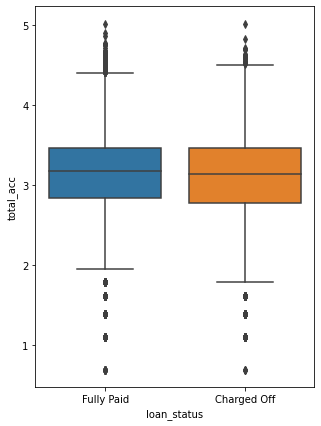

In [773]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["total_acc"]),
            x=df["loan_status"])

## initial_list_status :

- #### The initial listing status of the loan. Possible values are – W, F


In [774]:
df["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

f    238066
w    157964
Name: initial_list_status, dtype: int64


<AxesSubplot:xlabel='initial_list_status'>

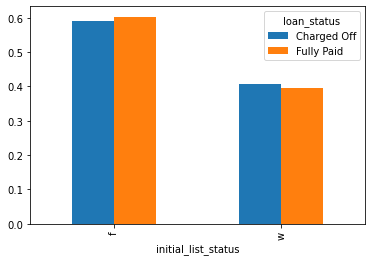

In [775]:
print(df["initial_list_status"].value_counts(dropna=False))

pd.crosstab(index = df["initial_list_status"],
            columns= df["loan_status"],normalize= "columns").plot(kind = "bar")


## application_type : 

- #### Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [776]:
df["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


<AxesSubplot:xlabel='application_type'>

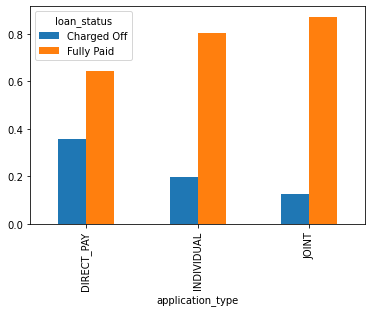

In [777]:
print(df["application_type"].value_counts(dropna=False))

pd.crosstab(index = df["application_type"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


## mort_acc : 

- #### Number of mortgage accounts.


In [778]:
# df["mort_acc"].value_counts(dropna=False)

In [779]:
df.groupby("loan_status")["mort_acc"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,72123.0,1.501213,1.974353,0.0,0.0,1.0,2.0,23.0
Fully Paid,286112.0,1.892836,2.182456,0.0,0.0,1.0,3.0,34.0


<AxesSubplot:xlabel='loan_status', ylabel='mort_acc'>

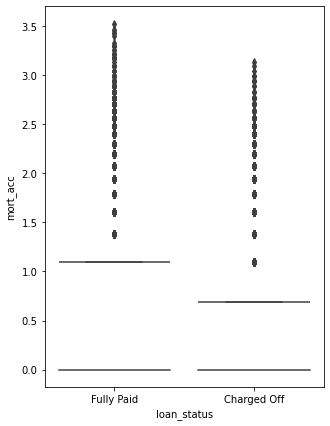

In [780]:
plt.figure(figsize=(5,7))
sns.boxplot(y= np.log(df["mort_acc"]),
            x=df["loan_status"])

## pub_rec_bankruptcies :
- #### Number of public record bankruptcies


In [781]:
df["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

0.0    350380
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64
loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                     19.499115   80.500885
1.0                     20.394952   79.605048
2.0                     23.226854   76.773146
3.0                     21.082621   78.917379
4.0                     31.707317   68.292683
5.0                     15.625000   84.375000
6.0                     28.571429   71.428571
7.0                     25.000000   75.000000
8.0                     50.000000   50.000000
All                     19.617441   80.382559


<AxesSubplot:xlabel='pub_rec_bankruptcies'>

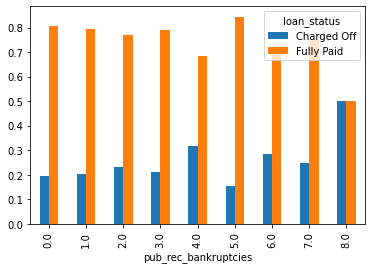

In [782]:
print(df["pub_rec_bankruptcies"].value_counts(dropna=False))
print(pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index", margins = True)*100)
pd.crosstab(index = df["pub_rec_bankruptcies"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


## Address:

- #### Address of the individual

In [783]:
df["address"][10]

'40245 Cody Drives\r\nBartlettfort, NM 00813'

In [784]:
df["address"] = df["address"].str.split().apply(lambda x:x[-1])

In [785]:
df["address"].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: address, dtype: int64

<AxesSubplot:xlabel='address'>

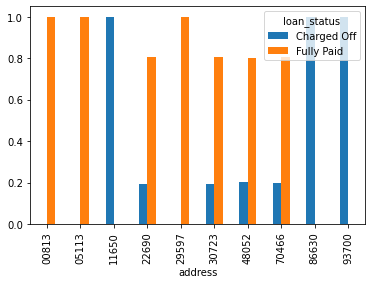

In [786]:
pd.crosstab(index = df["address"],
            columns= df["loan_status"],normalize= "index").plot(kind = "bar")


In [787]:
df["pin_code"] = df["address"]
df.drop(["address"],axis = 1  ,inplace=True)

# dropping unimportant columns 

In [788]:
df.drop(["title","issue_d","earliest_cr_line","initial_list_status"],axis = 1, inplace=True)

In [789]:
df.drop(["sub_grade","emp_length"],axis=1,inplace=True)

In [790]:
df.drop(["emp_title","pin_code"],axis=1,inplace=True)

## Outlier treatment :

In [791]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
print(len(num_cols))


for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    df = df[(df[col]<upper_limit) & (df[col]>lower_limit)]
df.shape

13


(327090, 19)

In [792]:
# def box_plot(col):
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(x=df[col])
#     plt.title('Boxplot')
#     plt.show()

# for col in num_cols:
#     box_plot(col)

In [793]:
num_cols

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'Loan_Tenure'], dtype='object')

# Missing value imputation : 

In [794]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF


missing_data = missing_df(df)
missing_data[missing_data["Total"]>0]


,Total,Percent


## Pre-proccessing : 


In [795]:
df["loan_status"].replace({"Fully Paid":0,
                          "Charged Off" : 1},inplace=True)

In [796]:
df.sample(3)

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure
303953,10000.0,36,6.49,A,MORTGAGE,62636.0,Not Verified,0,credit_card,10.73,6.0,0.0,3525.0,65.3,26.0,INDIVIDUAL,7.0,0.0,140.060371
207804,7000.0,36,21.60,E,RENT,42000.0,Not Verified,0,debt_consolidation,4.49,3.0,0.0,4610.0,96.0,4.0,INDIVIDUAL,0.0,0.0,70.999405
115056,8500.0,36,9.99,B,MORTGAGE,45000.0,Source Verified,0,home_improvement,8.88,8.0,0.0,59.0,0.7,19.0,INDIVIDUAL,0.0,0.0,176.956406


In [797]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'Loan_Tenure'], dtype='object')

In [798]:
categorical_target_en  = ["grade","term","home_ownership","verification_status","purpose","application_type"]
categorical_target_en

['grade',
 'term',
 'home_ownership',
 'verification_status',
 'purpose',
 'application_type']

In [799]:
from category_encoders import TargetEncoder
TEncoder = TargetEncoder()


In [800]:
for col in categorical_target_en:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()
    
    df[col] = TEncoder.fit_transform(df[col],df["loan_status"])


In [801]:
df

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,Loan_Tenure
0,10000.0,36,11.44,0.126193,0.233565,117000.0,0.148169,0,0.192366,26.24,16.0,0.0,36369.0,41.8,25.0,0.201509,0.0,0.0,295.036859
1,8000.0,36,11.99,0.126193,0.173643,65000.0,0.148169,0,0.211733,22.05,17.0,0.0,20131.0,53.3,27.0,0.201509,3.0,0.0,126.031335
2,15600.0,36,10.49,0.126193,0.233565,43057.0,0.223127,0,0.171494,12.79,13.0,0.0,11987.0,92.2,26.0,0.201509,0.0,0.0,89.036736
3,7200.0,36,6.49,0.063056,0.233565,54000.0,0.148169,0,0.171494,2.60,6.0,0.0,5472.0,21.5,13.0,0.201509,0.0,0.0,98.006119
4,24375.0,60,17.27,0.215780,0.173643,55000.0,0.229485,1,0.171494,33.95,13.0,0.0,24584.0,69.8,43.0,0.201509,1.0,0.0,169.038379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,0.126193,0.233565,64000.0,0.148169,0,0.211733,10.81,7.0,0.0,11456.0,97.1,9.0,0.201509,0.0,0.0,255.972402
396025,10000.0,60,10.99,0.126193,0.233565,40000.0,0.223127,0,0.211733,15.63,6.0,0.0,1990.0,34.3,23.0,0.201509,0.0,0.0,130.959568
396026,21000.0,36,12.29,0.215780,0.173643,110000.0,0.223127,0,0.211733,21.45,6.0,0.0,43263.0,95.7,8.0,0.201509,1.0,0.0,107.994004
396027,5000.0,36,9.99,0.126193,0.233565,56500.0,0.229485,0,0.211733,17.56,15.0,0.0,32704.0,66.9,23.0,0.201509,0.0,0.0,199.034888


## Train-test split : 

In [802]:
X = df.drop(["loan_status"],axis = 1)
y = df["loan_status"]

In [803]:
from sklearn.model_selection import train_test_split

In [804]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      random_state=2,
                                                      test_size=0.2)

## Standardizing  - preprocessing

In [805]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()



In [806]:
StandardScaler.fit(X_train)

StandardScaler()

In [807]:
X_train = StandardScaler.transform(X_train)
X_test = StandardScaler.transform(X_test)


## Data Balancing : 

In [808]:
from imblearn.over_sampling import SMOTE

In [809]:
SmoteBL = SMOTE(k_neighbors=5,
               random_state=12) 

In [810]:
X_smote , y_smote = SmoteBL.fit_resample(X_train,y_train)

In [811]:
X_smote.shape,  y_smote.shape

((418028, 18), (418028,))

In [854]:
from sklearn.linear_model import LogisticRegression

In [855]:
LogReg = LogisticRegression(max_iter=1000,C=1000)

In [856]:
from sklearn.model_selection import cross_val_score

In [857]:
cross_val_score(estimator = LogReg,
                cv=5,
                X = X_smote,
                y = y_smote,
                scoring= "f1"
            
       )

array([0.64742108, 0.65559734, 0.65334721, 0.6521034 , 0.65482399])

In [858]:
cross_val_score(estimator = LogReg,
                cv=5,
                X = X_smote,
                y = y_smote,
                scoring= "precision"
            
       )

array([0.65498923, 0.66293289, 0.66110744, 0.65991427, 0.65935825])

In [859]:
LogReg.fit(X= X_smote ,y =  y_smote)

LogisticRegression(C=1000, max_iter=1000)

In [860]:
LogReg.score(X_test,y_test)

0.6579228958390657

In [861]:
LogReg.coef_.round(2)

array([[ 0.13,  0.18,  0.01,  0.45,  0.11, -0.22,  0.07,  0.05,  0.19,
         0.17,  0.07, -0.11,  0.13, -0.13,  0.01, -0.04, -0.06,  0.  ]])

In [862]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
print(confusion_matrix(y_test, LogReg.predict(X_test)))
print(precision_score(y_test ,LogReg.predict(X_test)))
print(recall_score(y_test ,LogReg.predict(X_test)))
print(f1_score(y_test ,LogReg.predict(X_test)))



[[34643 17522]
 [ 4856  8397]]
0.32397083220803274
0.6335923941749038
0.4287245992035127


In [863]:
LogReg.coef_

array([[ 0.12610327,  0.18427793,  0.00702399,  0.44751248,  0.11069555,
        -0.22063141,  0.07082803,  0.045373  ,  0.19227675,  0.16948079,
         0.06731253, -0.10508207,  0.13452631, -0.13446032,  0.0067405 ,
        -0.04256223, -0.05558582,  0.00120019]])

In [864]:
df.drop(["loan_status"], axis = 1).columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'Loan_Tenure'], dtype='object')

In [865]:
feature_importance = pd.DataFrame(index = df.drop(["loan_status"],
                                                  axis = 1).columns,
                                  data = LogReg.coef_.ravel()).reset_index()
feature_importance

,index,0
0,loan_amnt,0.126103
1,term,0.184278
2,int_rate,0.007024
3,grade,0.447512
4,home_ownership,0.110696
5,annual_inc,-0.220631
6,verification_status,0.070828
7,purpose,0.045373
8,dti,0.192277
9,open_acc,0.169481


<AxesSubplot:xlabel='0', ylabel='index'>

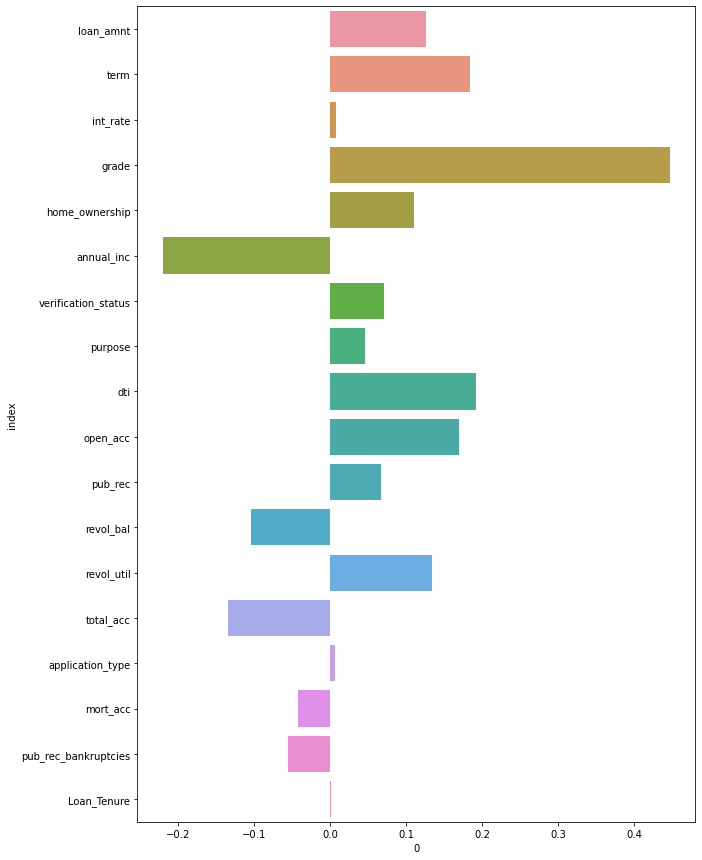

In [866]:
plt.figure(figsize=(10,15))
sns.barplot(y = feature_importance["index"],
           x =  feature_importance[0])

In [867]:
LogReg.score(X_train,y_train)

0.6614578556360635

In [868]:
LogReg.score(X_test,y_test)

0.6579228958390657

<AxesSubplot:>

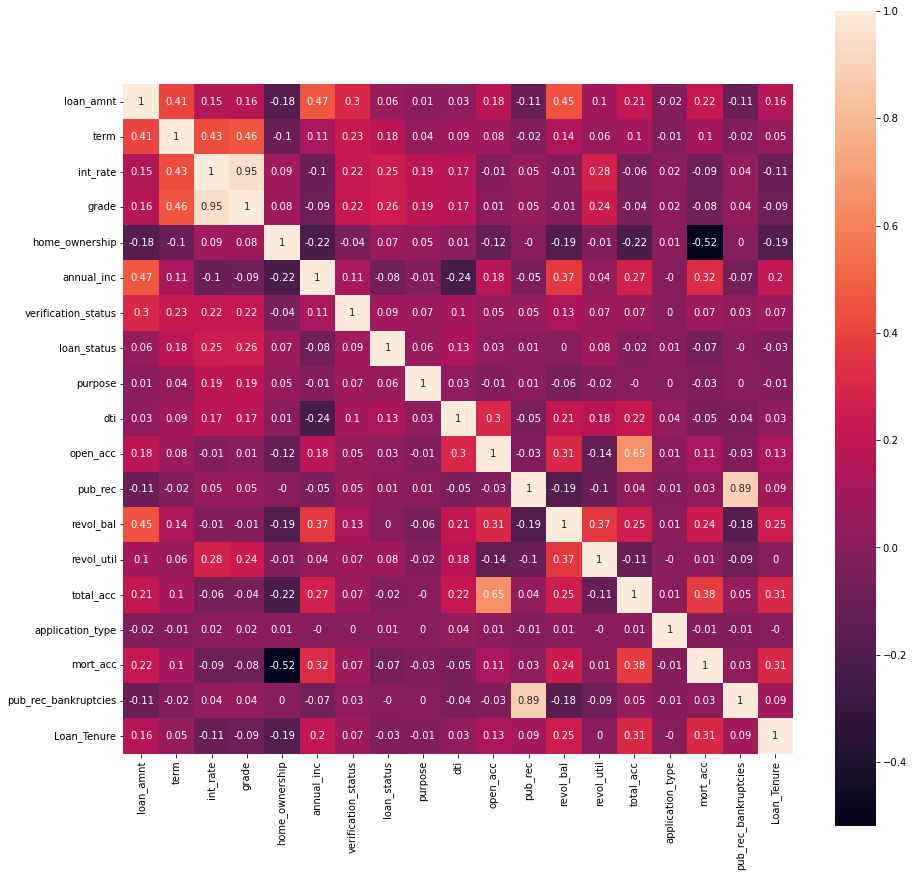

In [869]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr().round(2),annot=True,square=True)

## Metrics : 

In [870]:
from sklearn.metrics  import confusion_matrix, f1_score, precision_score,recall_score
confusion_matrix(y_test, LogReg.predict(X_test))



array([[34643, 17522],
       [ 4856,  8397]], dtype=int64)

In [871]:
precision_score(y_test ,LogReg.predict(X_test))

0.32397083220803274

In [872]:
recall_score(y_test ,LogReg.predict(X_test))

0.6335923941749038

In [873]:
pd.crosstab(y_test ,LogReg.predict(X_test))

col_0,0,1
loan_status,,
0,34643,17522
1,4856,8397


In [874]:
recall_score(y_train ,LogReg.predict(X_train))

0.6399027688100574

In [875]:
recall_score(y_test ,LogReg.predict(X_test))

0.6335923941749038

In [876]:
f1_score(y_test ,LogReg.predict(X_test))

0.4287245992035127

In [877]:
f1_score(y_train ,LogReg.predict(X_train))

0.4320581616756102

In [878]:
from sklearn.metrics import ConfusionMatrixDisplay

In [879]:
from sklearn.metrics import fbeta_score

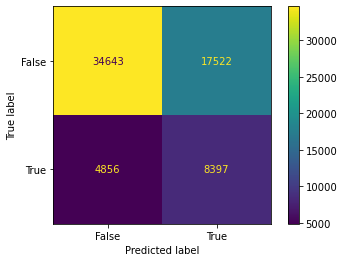

In [880]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test, 
                                                          LogReg.predict(X_test)),display_labels=[False,True])
cm_display.plot()
plt.show()

In [881]:
# fbeta_score

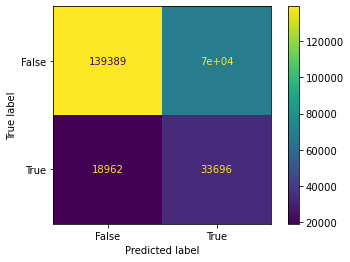

In [882]:
cm_display  = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_train, 
                                                          LogReg.predict(X_train)),display_labels=[False,True])
cm_display.plot()
plt.show()

In [889]:
from sklearn.tree import DecisionTreeClassifier

In [890]:
DecisionTreeClassifier = DecisionTreeClassifier(max_depth=, splitter="best",
                                               criterion="entropy")

In [891]:
DecisionTreeClassifier.fit(X_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [892]:
DecisionTreeClassifier.score(X_test,y_test)

0.7079397107829649

In [893]:
DecisionTreeClassifier.score(X_smote,y_smote)

0.6973145339546634

In [894]:
from sklearn.ensemble import RandomForestClassifier

In [900]:
RF = RandomForestClassifier(n_estimators=30,max_depth=10)

In [901]:
RF.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=10, n_estimators=30)

In [902]:
RF.score(X_test,y_test)

0.721529242716072

In [905]:
from sklearn.metrics import precision_recall_curve

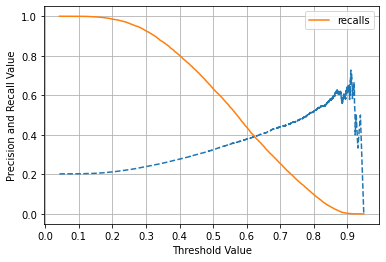

In [906]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])


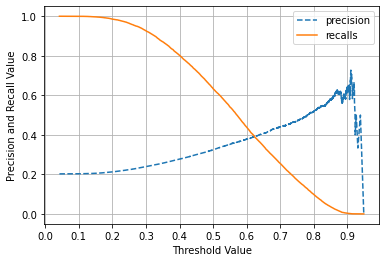

In [910]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, LogReg.predict_proba(X_test)[:,1])

In [917]:
from sklearn.metrics import roc_auc_score,roc_curve

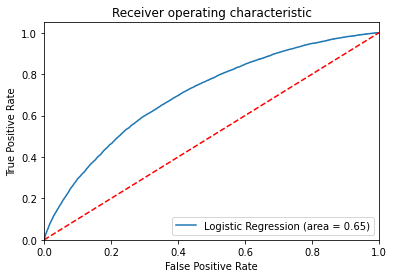

In [918]:
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [912]:
LogReg.predict_proba(X_test)

array([[0.4774544 , 0.5225456 ],
       [0.16595313, 0.83404687],
       [0.76618744, 0.23381256],
       ...,
       [0.74509916, 0.25490084],
       [0.20401556, 0.79598444],
       [0.39868658, 0.60131342]])